## ベースラインとなるお試し解析

### 前準備

In [1]:
import datetime
from pathlib import Path

import numpy as np
import pandas as pd
from joblib import Parallel, delayed

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Meiryo"
import seaborn as sns
from ydata_profiling import ProfileReport

In [2]:
from pycaret.utils import version
version()

'3.2.0'

#### 解析結果などが迷子にならないように時刻歴をつけておく

In [3]:
dt_now = datetime.datetime.now()
analysis_time = dt_now.strftime("%Y%m%d%H%M")

display(analysis_time)

'202401020849'

#### ルートディレクトリから解析ディレクトリを取りに行く

In [4]:
root_dir = Path().absolute()

data_dir = root_dir / "data"
data_dir.mkdir(exist_ok=True,parents=True)
display(f"data directory:{data_dir}")
display(list(data_dir.glob("*")))
#display(list(data_dir.glob("*/*"))) # すべてのファイルやディレクトリを見ると大変なことになった

'data directory:c:\\Users\\k2mks\\Documents\\ws\\SIGNATE_analysis\\projects\\42_Beginner\\data'

[WindowsPath('c:/Users/k2mks/Documents/ws/SIGNATE_analysis/projects/42_Beginner/data/input'),
 WindowsPath('c:/Users/k2mks/Documents/ws/SIGNATE_analysis/projects/42_Beginner/data/output')]

#### インプットとアウトプットのディレクトリ分けておく

In [5]:
input_dir = data_dir / "input"
input_dir.mkdir(exist_ok=True,parents=True)
display(input_dir)

output_dir = data_dir / "output"
output_dir.mkdir(exist_ok=True,parents=True)
display(output_dir)

WindowsPath('c:/Users/k2mks/Documents/ws/SIGNATE_analysis/projects/42_Beginner/data/input')

WindowsPath('c:/Users/k2mks/Documents/ws/SIGNATE_analysis/projects/42_Beginner/data/output')

In [6]:
analysis_dir = output_dir / analysis_time
analysis_dir.mkdir(exist_ok=True,parents=True)
display(analysis_dir)

WindowsPath('c:/Users/k2mks/Documents/ws/SIGNATE_analysis/projects/42_Beginner/data/output/202401020849')

In [7]:
!signate list 

  competitionId  title                                                                             closing     prize              submitters
---------------  --------------------------------------------------------------------------------  ----------  ---------------  ------------
              1  【練習問題】銀行の顧客ターゲティング                                              -                                    6947
             24  【練習問題】お弁当の需要予測                                                      -                                    8408
             27  【練習問題】Jリーグの観客動員数予測                                               -                                    2062
            100  【練習問題】手書き文字認識                                                        -           Knowledge                 341
            102  【練習問題】タイタニックの生存予測                                                -           Knowledge                2559
            103  【練習問題】音楽ラベリング                                                        -     

#### とりあえずデータの概要把握
それか、下記のコマンドでもデータをインストールすることができます
詳しい使い方や最新情報は[SIGNATE CLIドキュメント](https://github.com/signatelab/signate-cli)をご確認ください
```bash
signate download --competition-id=986 --path=./data/input
```

In [8]:
# インストールしたファイルの確認
input_file_list = list(input_dir.glob("*"))
display(input_file_list)

[WindowsPath('c:/Users/k2mks/Documents/ws/SIGNATE_analysis/projects/42_Beginner/data/input/42'),
 WindowsPath('c:/Users/k2mks/Documents/ws/SIGNATE_analysis/projects/42_Beginner/data/input/sample_submission.csv'),
 WindowsPath('c:/Users/k2mks/Documents/ws/SIGNATE_analysis/projects/42_Beginner/data/input/test.csv'),
 WindowsPath('c:/Users/k2mks/Documents/ws/SIGNATE_analysis/projects/42_Beginner/data/input/train.csv')]

In [9]:
# 確認対象のファイル名を指定
attention_file_name = "train.csv"

attention_file_path = [path for path in input_file_list if path.name == attention_file_name]
display(attention_file_path)


[WindowsPath('c:/Users/k2mks/Documents/ws/SIGNATE_analysis/projects/42_Beginner/data/input/train.csv')]

In [10]:
#train_df = pd.read_csv(train_data_path, index_col=0,low_memory=False)
train_df = pd.read_csv(attention_file_path[0])

概要

In [11]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19984 entries, 0 to 19983
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19984 non-null  int64 
 1   created_at  19984 non-null  object
 2   tree_dbh    19984 non-null  int64 
 3   curb_loc    19984 non-null  object
 4   health      19984 non-null  int64 
 5   steward     5101 non-null   object
 6   guards      5041 non-null   object
 7   sidewalk    19984 non-null  object
 8   user_type   19984 non-null  object
 9   problems    7741 non-null   object
 10  spc_common  19984 non-null  object
 11  spc_latin   19984 non-null  object
 12  nta         19984 non-null  object
 13  nta_name    19984 non-null  object
 14  borocode    19984 non-null  int64 
 15  boro_ct     19984 non-null  int64 
 16  boroname    19984 non-null  object
 17  zip_city    19984 non-null  object
 18  cb_num      19984 non-null  int64 
 19  st_senate   19984 non-null  int64 
 20  st_ass

None

欠損値の数

In [12]:
display(train_df.isnull().sum())

Unnamed: 0        0
created_at        0
tree_dbh          0
curb_loc          0
health            0
steward       14883
guards        14943
sidewalk          0
user_type         0
problems      12243
spc_common        0
spc_latin         0
nta               0
nta_name          0
borocode          0
boro_ct           0
boroname          0
zip_city          0
cb_num            0
st_senate         0
st_assem          0
cncldist          0
dtype: int64

欠損の割合

In [13]:
display(train_df.count()/len(train_df))

Unnamed: 0    1.000000
created_at    1.000000
tree_dbh      1.000000
curb_loc      1.000000
health        1.000000
steward       0.255254
guards        0.252252
sidewalk      1.000000
user_type     1.000000
problems      0.387360
spc_common    1.000000
spc_latin     1.000000
nta           1.000000
nta_name      1.000000
borocode      1.000000
boro_ct       1.000000
boroname      1.000000
zip_city      1.000000
cb_num        1.000000
st_senate     1.000000
st_assem      1.000000
cncldist      1.000000
dtype: float64

統計量

In [14]:
describe_df = train_df.describe(include="all")
display(describe_df)

,Unnamed: 0,created_at,tree_dbh,curb_loc,health,steward,guards,sidewalk,user_type,problems,...,nta,nta_name,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist
count,19984.000000,19984,19984.000000,19984,19984.000000,5101,5041,19984,19984,7741,...,19984,19984,19984.000000,1.998400e+04,19984,19984,19984.000000,19984.000000,19984.000000,19984.000000
unique,NaN,447,NaN,2,NaN,3,3,2,3,73,...,187,187,NaN,NaN,5,45,NaN,NaN,NaN,NaN
top,NaN,2015-10-15,NaN,OnCurb,NaN,1or2,Helpful,NoDamage,Volunteer,Stones,...,SI54,Great Kills,NaN,NaN,Queens,Brooklyn,NaN,NaN,NaN,NaN
freq,NaN,421,NaN,18777,NaN,3999,3650,10689,11189,2219,...,368,368,NaN,NaN,6572,5119,NaN,NaN,NaN,NaN
mean,9991.500000,NaN,11.694906,NaN,0.858036,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.360088,3.405346e+06,NaN,NaN,343.159077,21.111189,51.913981,30.346327
std,5769.028226,NaN,8.198150,NaN,0.437807,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.232246,1.239741e+06,NaN,NaN,122.264942,7.188537,18.642931,14.824068
min,0.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,1.000202e+06,NaN,NaN,101.000000,10.000000,23.000000,1.000000
25%,4995.750000,NaN,5.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.000000,3.005900e+06,NaN,NaN,301.000000,15.000000,33.000000,19.000000
50%,9991.500000,NaN,9.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.000000,4.009200e+06,NaN,NaN,402.000000,22.000000,56.000000,31.000000
75%,14987.250000,NaN,17.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.000000,4.122300e+06,NaN,NaN,413.000000,25.000000,64.000000,44.000000


概要確認の外部出力

In [15]:
describe_df.to_csv(analysis_dir / "describe_df.csv")

In [16]:
profile = ProfileReport(train_df, title="Profiling Report")

In [17]:
# profile.to_widgets()
# profile.to_notebook_iframe()
profile.to_file(analysis_dir /"profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##### データの重複等をチェック

In [18]:
index = "Unnamed: 0"

display(f"duplicated data number: {len(train_df[train_df.duplicated(subset=index)])}")
display(f"duplicated data: {train_df[train_df.duplicated(subset=index)]}")

#train_df[train_df.duplicated(subset="id")]

'duplicated data number: 0'

'duplicated data: Empty DataFrame\nColumns: [Unnamed: 0, created_at, tree_dbh, curb_loc, health, steward, guards, sidewalk, user_type, problems, spc_common, spc_latin, nta, nta_name, borocode, boro_ct, boroname, zip_city, cb_num, st_senate, st_assem, cncldist]\nIndex: []\n\n[0 rows x 22 columns]'

In [19]:
display(f"cloums number: {len(train_df.columns)}")
display(train_df.columns)

'cloums number: 22'

Index(['Unnamed: 0', 'created_at', 'tree_dbh', 'curb_loc', 'health', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'spc_common',
       'spc_latin', 'nta', 'nta_name', 'borocode', 'boro_ct', 'boroname',
       'zip_city', 'cb_num', 'st_senate', 'st_assem', 'cncldist'],
      dtype='object')

In [20]:
display(train_df.head(3))

,Unnamed: 0,created_at,tree_dbh,curb_loc,health,steward,guards,sidewalk,user_type,problems,...,nta,nta_name,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist
0,0,2015-06-29,14,OnCurb,1,NaN,NaN,Damage,Volunteer,NaN,...,QN45,Douglas Manor-Douglaston-Little Neck,4,4152901,Queens,Little Neck,411,11,25,23
1,1,2016-09-21,5,OnCurb,1,3or4,Helpful,NoDamage,Volunteer,NaN,...,BX05,Bedford Park-Fordham North,2,2039901,Bronx,Bronx,207,33,78,15
2,2,2015-09-13,26,OnCurb,2,NaN,NaN,NoDamage,Volunteer,StonesBranchLights,...,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,5,5017011,Staten Island,Staten Island,503,24,62,51


### [pycaret](https://pycaret.org/)による解析

In [21]:
#from pycaret.regression import *
from pycaret.classification import *

In [22]:
target_col = "health"
demo = setup(data = train_df, target = target_col,fix_imbalance=True,use_gpu = True,session_id = 123)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leav

,Description,Value
0,Session id,123
1,Target,health
2,Target type,Multiclass
3,Original data shape,"(19984, 22)"
4,Transformed data shape,"(39071, 32)"
5,Transformed train set shape,"(33075, 32)"
6,Transformed test set shape,"(5996, 32)"
7,Ordinal features,2
8,Numeric features,8
9,Categorical features,13


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leav

In [23]:
# compare_models(sort='RMSLE', n_select = 3)
compare_models(sort='F1')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:50:07
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7716,0.5399,0.7716,0.6637,0.6976,0.0133,0.0208,3.8780
gbc,Gradient Boosting Classifier,0.7618,0.5361,0.7618,0.6633,0.6970,0.0166,0.0221,36.2490
xgboost,Extreme Gradient Boosting,0.7576,0.5320,0.7576,0.6587,0.6950,0.0126,0.0164,1.6470
catboost,CatBoost Classifier,0.7487,0.5252,0.7487,0.6602,0.6935,0.0148,0.0176,10.2270
rf,Random Forest Classifier,0.7542,0.5257,0.7542,0.6569,0.6933,0.0073,0.0095,1.7420
et,Extra Trees Classifier,0.7529,0.5202,0.7529,0.6553,0.6922,0.0040,0.0050,1.1370
ada,Ada Boost Classifier,0.6970,0.5261,0.6970,0.6632,0.6781,0.0253,0.0259,2.8000
dt,Decision Tree Classifier,0.6145,0.5011,0.6145,0.6547,0.6332,0.0024,0.0024,0.7310
knn,K Neighbors Classifier,0.4372,0.4994,0.4372,0.6527,0.5069,-0.0020,-0.0023,0.6140
svm,SVM - Linear Kernel,0.5153,0.0000,0.5153,0.3792,0.4280,0.0000,0.0000,1.7900


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device='gpu', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=123, reg_alpha=0.0, reg_lambda=0.0,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [24]:
model = create_model("xgboost")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:00:51
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7691,0.4993,0.7691,0.6543,0.6948,0.0054,0.0085
1,0.7470,0.5225,0.7470,0.6516,0.6881,-0.0033,-0.0040
2,0.7620,0.5507,0.7620,0.6701,0.7024,0.0408,0.0519
3,0.7605,0.5324,0.7605,0.6557,0.6945,0.0137,0.0185
4,0.7584,0.5169,0.7584,0.6560,0.6936,0.0036,0.0048
5,0.7548,0.5401,0.7548,0.6582,0.6940,0.0097,0.0124
6,0.7527,0.5368,0.7527,0.6559,0.6919,0.0040,0.0051
7,0.7513,0.5363,0.7513,0.6544,0.6910,0.0002,0.0002
8,0.7604,0.5480,0.7604,0.6725,0.7033,0.0338,0.0424


In [25]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [26]:
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

In [27]:
plot_model(model, plot = 'parameter')

,Parameters
objective,multi:softprob
base_score,None
booster,gbtree
callbacks,None
colsample_bylevel,None
colsample_bynode,None
colsample_bytree,None
device,gpu
early_stopping_rounds,None
enable_categorical,False


In [28]:
tuned_model = tune_model(model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:01:14
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7820,0.5082,0.7820,0.6651,0.6964,0.0058,0.0143
1,0.7698,0.5229,0.7698,0.6573,0.6940,0.0036,0.0059
2,0.7784,0.5371,0.7784,0.6721,0.6989,0.0191,0.0356
3,0.7763,0.5424,0.7763,0.6727,0.7000,0.0228,0.0390
4,0.7798,0.5324,0.7798,0.6765,0.6992,0.0176,0.0344
5,0.7791,0.5675,0.7791,0.6663,0.6970,0.0072,0.0149
6,0.7777,0.5437,0.7777,0.6630,0.6974,0.0077,0.0148
7,0.7820,0.5185,0.7820,0.6714,0.6993,0.0190,0.0400
8,0.7790,0.5541,0.7790,0.6558,0.6959,-0.0013,-0.0027


Fitting 10 folds for each of 10 candidates, totalling 100 fits


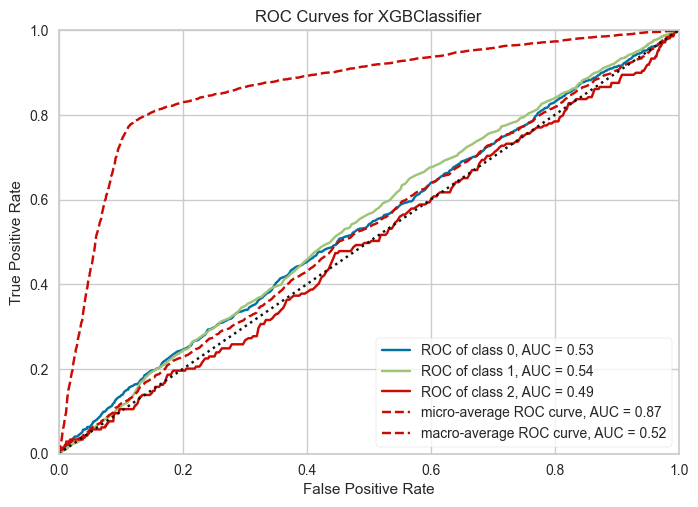

In [29]:
# 残渣の可視化
plot_model(tuned_model)

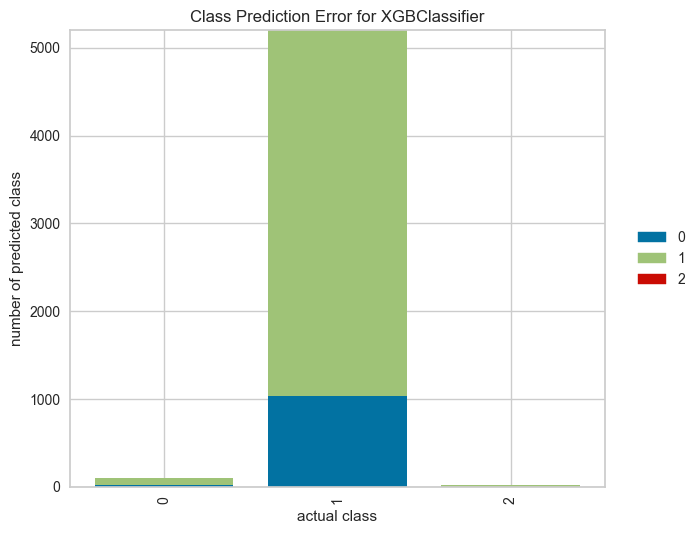

In [30]:
# 真値と予測値の相関
plot_model(tuned_model, plot = 'error')

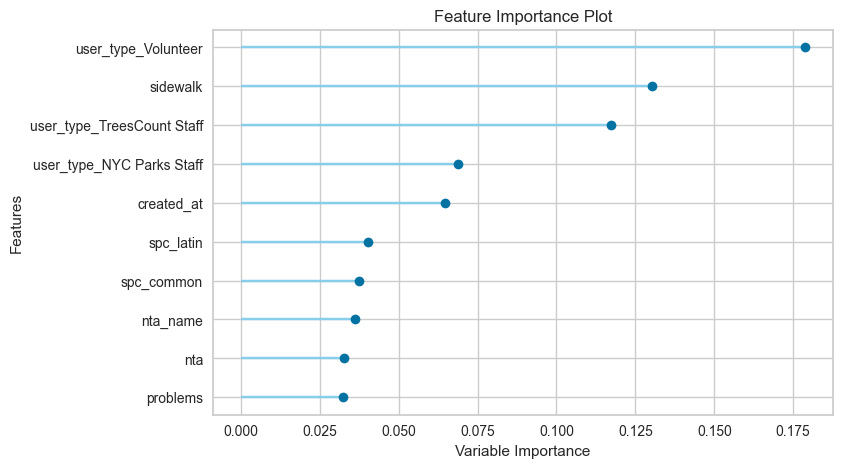

In [31]:
# 特徴量の重要度別のグラフ
plot_model(tuned_model, plot='feature')

In [32]:
predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7789,0.5396,0.7789,0.6759,0.6995,0.0176,0.0334


,Unnamed: 0,created_at,tree_dbh,curb_loc,steward,guards,sidewalk,user_type,problems,spc_common,...,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist,health,prediction_label,prediction_score
19493,19493,2015-08-06,6,OnCurb,3or4,Helpful,NoDamage,Volunteer,NaN,littleleaf linden,...,5025100,Staten Island,Staten Island,501,24,61,50,1,1,0.3333
11830,11830,2015-11-05,29,OnCurb,NaN,NaN,Damage,TreesCount Staff,NaN,red maple,...,5009601,Staten Island,Staten Island,502,24,63,50,1,1,0.3333
18750,18750,2016-05-20,9,OnCurb,NaN,NaN,Damage,TreesCount Staff,BranchLights,green ash,...,3110400,Brooklyn,Brooklyn,305,19,60,42,0,1,0.3333
15972,15972,2015-10-13,6,OnCurb,NaN,NaN,NoDamage,Volunteer,Stones,pin oak,...,1016400,Manhattan,New York,111,29,68,8,1,1,0.3333
5001,5001,2015-10-07,5,OnCurb,1or2,Helpful,NoDamage,Volunteer,NaN,honeylocust,...,1016100,Manhattan,New York,107,29,67,6,1,1,0.3333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8696,8696,2016-06-12,22,OnCurb,1or2,Helpful,NoDamage,Volunteer,NaN,purple-leaf plum,...,4032700,Queens,East Elmhurst,403,13,34,25,1,1,0.3333
12275,12275,2015-08-13,2,OnCurb,NaN,NaN,NoDamage,TreesCount Staff,NaN,cherry,...,2046202,Bronx,Bronx,212,36,83,12,1,1,0.3333
4176,4176,2015-08-06,7,OnCurb,NaN,NaN,NoDamage,TreesCount Staff,NaN,cherry,...,3026100,Brooklyn,Brooklyn,303,25,56,36,1,1,0.3333
7883,7883,2015-12-19,20,OnCurb,NaN,NaN,Damage,TreesCount Staff,NaN,Norway maple,...,3017700,Brooklyn,Brooklyn,306,21,44,39,1,1,0.3333


In [33]:
# 確認対象のファイル名を指定
attention_file_name = "test.csv"

attention_file_path = [path for path in input_file_list if path.name == attention_file_name]
display(attention_file_path)

[WindowsPath('c:/Users/k2mks/Documents/ws/SIGNATE_analysis/projects/42_Beginner/data/input/test.csv')]

In [34]:
test_df = pd.read_csv(attention_file_path[0])

In [35]:
predict_model(tuned_model, data=test_df)

,Unnamed: 0,created_at,tree_dbh,curb_loc,steward,guards,sidewalk,user_type,problems,spc_common,...,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist,prediction_label,prediction_score
0,19984,2015-09-08,15,OnCurb,NaN,NaN,Damage,NYC Parks Staff,NaN,Callery pear,...,3,3062000,Brooklyn,Brooklyn,315,22,45,48,1,0.3333
1,19985,2015-10-15,5,OnCurb,1or2,NaN,NoDamage,Volunteer,NaN,cherry,...,2,2045101,Bronx,Bronx,212,34,81,11,1,0.3333
2,19986,2016-08-03,4,OnCurb,NaN,Unsure,NoDamage,Volunteer,NaN,littleleaf linden,...,4,4013800,Queens,Kew Gardens,409,14,27,29,1,0.3333
3,19987,2015-08-06,7,OnCurb,NaN,NaN,NoDamage,TreesCount Staff,NaN,dawn redwood,...,3,3000301,Brooklyn,Brooklyn,302,26,52,33,1,0.3333
4,19988,2015-10-21,6,OnCurb,1or2,Helpful,NoDamage,TreesCount Staff,Stones,purple-leaf plum,...,3,3025100,Brooklyn,Brooklyn,303,25,56,36,1,0.3333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19697,39964,2015-09-10,3,OnCurb,1or2,Harmful,Damage,Volunteer,StonesRootOther,Japanese snowbell,...,5,5012200,Staten Island,Staten Island,502,24,64,50,1,0.3333
19698,39965,2016-09-09,9,OnCurb,1or2,NaN,NoDamage,NYC Parks Staff,NaN,silver maple,...,4,4093900,Queens,College Point,407,11,27,19,1,0.3333
19699,39966,2015-12-31,16,OnCurb,NaN,NaN,Damage,Volunteer,NaN,Callery pear,...,2,2039500,Bronx,Bronx,206,33,86,15,1,0.3333
19700,39967,2016-09-07,24,OnCurb,NaN,NaN,Damage,TreesCount Staff,RootOtherTrunkOtherBranchOther,London planetree,...,3,3037300,Brooklyn,Brooklyn,316,25,55,41,1,0.3333


In [36]:
# !mlflow ui

In [37]:
save_model(tuned_model,analysis_dir / 'test-tuned_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Unnamed: 0', 'tree_dbh',
                                              'borocode', 'boro_ct', 'cb_num',
                                              'st_senate', 'st_assem',
                                              'cncldist'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))...
         

In [38]:
load_model = load_model(analysis_dir / 'test-tuned_model')

Transformation Pipeline and Model Successfully Loaded


In [39]:
final_model = finalize_model(tuned_model)

In [40]:
pred = predict_model(final_model, data = test_df)
display(pred)

,Unnamed: 0,created_at,tree_dbh,curb_loc,steward,guards,sidewalk,user_type,problems,spc_common,...,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist,prediction_label,prediction_score
0,19984,2015-09-08,15,OnCurb,NaN,NaN,Damage,NYC Parks Staff,NaN,Callery pear,...,3,3062000,Brooklyn,Brooklyn,315,22,45,48,1,0.3333
1,19985,2015-10-15,5,OnCurb,1or2,NaN,NoDamage,Volunteer,NaN,cherry,...,2,2045101,Bronx,Bronx,212,34,81,11,1,0.3333
2,19986,2016-08-03,4,OnCurb,NaN,Unsure,NoDamage,Volunteer,NaN,littleleaf linden,...,4,4013800,Queens,Kew Gardens,409,14,27,29,1,0.3333
3,19987,2015-08-06,7,OnCurb,NaN,NaN,NoDamage,TreesCount Staff,NaN,dawn redwood,...,3,3000301,Brooklyn,Brooklyn,302,26,52,33,1,0.3333
4,19988,2015-10-21,6,OnCurb,1or2,Helpful,NoDamage,TreesCount Staff,Stones,purple-leaf plum,...,3,3025100,Brooklyn,Brooklyn,303,25,56,36,1,0.3333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19697,39964,2015-09-10,3,OnCurb,1or2,Harmful,Damage,Volunteer,StonesRootOther,Japanese snowbell,...,5,5012200,Staten Island,Staten Island,502,24,64,50,1,0.3333
19698,39965,2016-09-09,9,OnCurb,1or2,NaN,NoDamage,NYC Parks Staff,NaN,silver maple,...,4,4093900,Queens,College Point,407,11,27,19,1,0.3333
19699,39966,2015-12-31,16,OnCurb,NaN,NaN,Damage,Volunteer,NaN,Callery pear,...,2,2039500,Bronx,Bronx,206,33,86,15,1,0.3333
19700,39967,2016-09-07,24,OnCurb,NaN,NaN,Damage,TreesCount Staff,RootOtherTrunkOtherBranchOther,London planetree,...,3,3037300,Brooklyn,Brooklyn,316,25,55,41,1,0.3333


In [41]:
output = pd.DataFrame({index: pred[index],target_col: pred["prediction_label"]})

In [42]:
dt = datetime.datetime.now()
save_time = dt.strftime("%Y%m%d%H%M")
display(save_time)

'202401020908'

In [43]:
output.to_csv(analysis_dir / f"submission_{save_time}.csv", index=False)

#### 前処理方法の検討

データを眺めていて、637351個のデータに対する特徴量として良さげな数の特徴を利用する


|カラム	|ヘッダ名称	|データ型 |説明|
|:--|:--|:--|:--|
|0|id	|int|	インデックスとして使用|
|1	|accommodates	|int|収容可能人数|
|2|amenities	|char	|アメニティ|
|3	|bathrooms	|float	|風呂数|
|4	|bed_type	|char	|ベッドの種類|
|5	|bedrooms	|float	|ベッドルーム数|
|6	|beds	|float	|ベッド数|
|7	|cancellation_policy	|char	|キャンセルポリシー|
|8	|city	|char	|都市|
|9	|cleaning_fee	|int	|クリーニング料金を含むか|
|10	|description	|char	|説明|
|11|first_review |	char|	最初のレビュー日|
|12	|host_has_profile_pic	|int	|ホストの写真があるかどうか|
|13	|host_identity_verified	|int	|ホストの身元確認が取れているか|
|14	|host_response_rate	|char	|ホストの返信率|
|15	|host_since	|char	|ホストの登録日|
|16	|instant_bookable	|char	|即時予約可能か|
|17	|last_review	|char	|最後のレビュー日|
|18	|latitude	|float	|緯度|
|19	|longitude	|float	|経度|
|20	|name	|char	|物件名|
|21	|neighbourhood	|char	|近隣情報|
|22	|number_of_reviews	|int	|レビュー数|
|23	|property_type	|char	|物件の種類|
|24	|review_scores_rating	|float	|レビュースコア|
|25	|room_type	|char	|部屋の種類|
|26	|thumbnail_url	|char	|サムネイル画像リンク|
|27	|zipcode	|int	|郵便番号|
|28	|y	|float	|宿泊価格|

- [x] id:識別子| まあ必要
- [x] accommodates:収容可能人数|欠損値ないし使っておきたい
- [x] amenities:アメニティ|初回から文字情報をつかいたくない。ただ、何か特定のものがあるか否かくらいは計算してもいいかも
- [x] bathrooms:風呂数|0.3%(147件)の欠損なので、中央値とかで補完して計算する
- [x] bed_type:ベッドの種類|カテゴリデータとして使っておこう
- [x] bedrooms:ベッドルーム数|0.1%(71件)欠損なので、中央値でも採用しておこう
- [x] beds:ベッド数|0.2%(96件)の欠損なので、中央値で補完しておこう。それか、ベッドルームの数との相関をとって補完するか
- [x] cancellation_policy:キャンセルポリシー|カテゴリデータとして使いましょう
- [ⅹ] city:都市|カテゴリデータとして使いましょう
- [x] cleaning_fee:クリーニング料金を含むか|ブーリアンとして使いましょう
- [ ] description:説明|文字データは使い難くないが、将来的には感情分析の結果で置き換えてもいいのかも?
- [ ] first_review:最初のレビュー日|21.4%(11908)も欠損があるので、今回はいったんなしで
- [x] host_has_profile_pic:ホストの写真があるかどうか|0.3%(148件)の欠損値を別のカテゴリにしてカテゴリデータに
- [x] host_identity_verified:ホストの身元確認が取れているか|0.3%(148件)の欠損値を別のカテゴリにしてカテゴリデータに
- [ ] host_response_rate:ホストの返信率|お前はintだろう。だが、24.7%(13704件)の欠損がみられるので一旦保留
- [ ] host_since:ホストの登録日|0.3%(148件)の欠損がるが、年度を目安にカテゴリに分けてしまっていいかも
- [x] instant_bookable:即時予約可能か|真偽値として使用
- [ ] last_review:最後のレビュー日|21.4%(11880件)の欠損値がある。ただ、年度くらいでカテゴリデータに変えてあげてもいいかも
- [x] latitude:緯度|地域別のデータに変えて、カテゴリデータとして使用(細かな駅近かどうかは無視)
- [x] longitude:経度|地域別のデータに変えて、カテゴリデータとして使用(細かな駅近かどうかは無視)
- [ ] name:物件名|物件の種類で十分な気はする
- [ ] neighbourhood:近隣情報|文字データは使いたくない
- [ ] number_of_reviews:レビュー数|よいのレビューなのか悪いレビューなのかわからないので使わない
- [x] property_type:物件の種類|カテゴリデータとして使いましょう
- [ ] review_scores_rating:レビュースコア|22.5(4166件)の欠損値があるのは厳しいが、レビューとの掛け算で何か出てきそうな気はする
- [x] room_type:部屋の種類| カテゴリデータとして使いましょう
- [ ] thumbnail_url:サムネイル画像リンク|いらないだろう。画像のありなし、画像分類をすればちょっとはわかることが増えるかもしれない
- [ ] zipcode:郵便番号| 緯度経度とこっちのどちらかを使えるといいのかもしれない

- [x] y:宿泊価格|目的変数

In [27]:
dorp_columns = ["description","first_review","host_response_rate","last_review","name","neighbourhood","number_of_reviews","review_scores_rating","thumbnail_url","zipcode"]
train_df_dorp =train_df.drop(columns=dorp_columns)

display(train_df_dorp.describe(include="all"))
display(train_df_dorp.head(5))

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,latitude,longitude,property_type,room_type,y
count,55583.000000,55583.000000,55583,55436.000000,55583,55512.000000,55487.000000,55583,55583,55583,55435,55435,55435,55583,55583.000000,55583.000000,55583,55583,55583.000000
unique,NaN,NaN,51031,NaN,5,NaN,NaN,5,6,2,2,2,3047,2,NaN,NaN,34,3,NaN
top,NaN,NaN,{},NaN,Real Bed,NaN,NaN,strict,NYC,t,t,t,2015-03-30,f,NaN,NaN,Apartment,Entire home/apt,NaN
freq,NaN,NaN,435,NaN,53989,NaN,NaN,24318,24326,40821,55265,37264,172,41034,NaN,NaN,36826,30939,NaN
mean,27791.000000,3.152906,NaN,1.236426,NaN,1.265312,1.711770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.450812,-92.342406,NaN,NaN,160.163647
std,16045.574343,2.153001,NaN,0.583074,NaN,0.849319,1.257822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.080869,21.687844,NaN,NaN,168.087140
min,0.000000,1.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.338905,-122.511500,NaN,NaN,1.000000
25%,13895.500000,2.000000,NaN,1.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.128205,-118.341876,NaN,NaN,74.000000
50%,27791.000000,2.000000,NaN,1.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.663312,-76.995602,NaN,NaN,111.000000
75%,41686.500000,4.000000,NaN,1.000000,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.746146,-73.954703,NaN,NaN,185.000000


,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,latitude,longitude,property_type,room_type,y
0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,t,f,2016-07-13,f,33.788931,-118.154761,Apartment,Private room,138.0
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,t,t,2015-12-30,f,38.934810,-76.978190,House,Private room,42.0
2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,t,f,2016-05-21,t,40.695118,-73.926240,Apartment,Private room,65.0
3,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,t,t,2012-06-19,t,37.796728,-122.411906,Apartment,Private room,166.0
4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,t,t,2015-03-25,f,40.785050,-73.974691,Apartment,Entire home/apt,165.0


#### 各変数を個別にどうにかしてみる

In [28]:
# ProfileReportが大体いい感じに可視化してくれるので使わなくてよいかもというところではある
def category_correlation_plotter(x_colum:str,y_colum:str,attention_df:pd.DataFrame,output_path:Path) -> None:
    """カテゴリデータの傾向を見る関数

    Args:
        x_colum (str): 比較したい列名
        y_colum (str): 目的変数
        attention_df (pd.DataFrame): 使うDataFrame
        output_path (Path): 画像ファイルの出力先
    """
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=90)
    sns.boxplot(x=x_colum, y=y_colum, data=attention_df)
    plt.savefig(output_path/ f"{y_colum}_{x_colum}.png")
    plt.clf()

def numerial_correlation_plotter(x_colum:str,y_colum:str,attention_df:pd.DataFrame,output_path:Path) -> None:
    """数値データの傾向を見る関数

    Args:
        x_colum (str): 比較したい列名
        y_colum (str): 目的変数
        attention_df (pd.DataFrame): 使うDataFrame
        output_path (Path): 画像ファイルの出力先
    """
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=90)
    sns.scatterplot(x=x_colum, y=y_colum, data=attention_df)
    plt.savefig(output_path/ f"{y_colum}_{x_colum}.png")
    plt.clf()

In [29]:
# カテゴリデータの場合
category_colums_list = ["bed_type","cancellation_policy","city","cleaning_fee","host_has_profile_pic","host_identity_verified","instant_bookable","property_type","room_type"]
y_colum='y'

category_dir = analysis_dir / "category"
category_dir.mkdir(exist_ok=True,parents=True)

for category in category_colums_list:
    category_correlation_plotter(category,y_colum,train_df_dorp,category_dir)


In [30]:
# 数値データの場合
numerical_colums_list = ["accommodates","bathrooms","bedrooms","beds","latitude","longitude"]
y_colum='y'

numerical_dir = analysis_dir / "numerical"
numerical_dir.mkdir(exist_ok=True,parents=True)

for numerical in numerical_colums_list:
    numerial_correlation_plotter(numerical,y_colum,train_df_dorp,numerical_dir)

In [31]:
# 緯度経度を可視化したい
import folium
points_name = ["name", "latitude","longitude"]

points = train_df[points_name].values
display(len(points))
display(points)

55583

array([['The Penthouse', 33.788930644383385, -118.15476126080172],
       ['Guest Bedroom in Brookland', 38.93481019354563,
        -76.9781897080288],
       ['Clean Modern Room in Lux Apt 1 Block From J Train',
        40.695117939681, -73.92623962364601],
       ...,
       ['Cozy Bedroom in Mission District', 37.76222156417708,
        -122.41649276279558],
       ['Private Room in Resort-Style Townhouse', 34.217543327830754,
        -118.5342602265028],
       ['My Place ....', 34.1641784526225, -118.44246182532248]],
      dtype=object)

In [32]:
plt.title("緯度経度を用いたおおよその位置関係")
sns.scatterplot(x=points[:,2], y=points[:,1])
plt.show()

C:\Users\k2mks\AppData\Local\Temp\ipykernel_25548\3855728826.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [33]:
mean_latitudes = points[:,1].mean()
mean_longitude = points[:,2].mean()


In [34]:
# 地図の描写に関する設定
folium_map = folium.Map(location=[mean_latitudes, mean_longitude], zoom_start=5)

#display(folium_map)
folium_map.save(analysis_dir / "just_map.html")

In [35]:
# 個別の座標をポイント
for i, point in enumerate(points):
  folium.Marker(location=point[1:3],popup=folium.map.Popup(point[0],show=True)).add_to(folium_map)
  # 数点描写して、確認してみる
  if i == 20:
    break
#display(folium_map)
folium_map.save(analysis_dir / "map_add_the_location.html")

[出力された地図](./map_add_the_location.html)

In [36]:
from sklearn.cluster import DBSCAN

clustering_db = DBSCAN(eps=1, min_samples=1, metric='euclidean').fit(points[:,1:3])
display(len(clustering_db.labels_))

unique, counts = np.unique(clustering_db.labels_, return_counts=True)
display(np.asarray((unique, counts)).T)

55583

array([[    0, 16828],
       [    1,  4259],
       [    2, 24326],
       [    3,  4768],
       [    4,  2807],
       [    5,  2595]], dtype=int64)

もうちょっと細かなクラスタリングをしたいと思った時に検討しよう

```python
# 可視化した緯度経度をもとにクラスタリングを実施して、前処理を行う
from sklearn.cluster import HDBSCAN

clustering_hdb = HDBSCAN().fit(points[:,1:3])
display(len(clustering_hdb.labels_))

unique, counts = np.unique(clustering_hdb.labels_, return_counts=True)
display(np.asarray((unique, counts)).T)
```

In [37]:
# ちょくちょく確認可能な型の問題を手動で解消する
# train_df_dorp = train_df_dorp.replace({"最寄駅：距離（分）": {"30分?60分": "30", "1H?1H30": "60", "1H30?2H": "90","2H?": "120"},"面積（㎡）": {"2000㎡以上":"2000"}})

#### いい感じの前処理方法の検討

[sklearn.preprocessing: Preprocessing and Normalization](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)からいいヤツないかを探す

In [38]:
# 日本語は何かと問題になるので、横文字に替えておく
# rename_dict = {'容積率（％）':"youseki", '建ぺい率（％）':"innpei",\
#                                               '建物の構造':"kouzou", '改装':"kaisou", '最寄駅：距離（分）':"kyori", \
#                                                 '用途':"youto", '都市計画':"keikaku", '都道府県名':"kenn",\
#                                                     '面積（㎡）':"menseki","取引価格（総額）_log":"y"}
# train_df_dorp = train_df_dorp.rename(columns=rename_dict)

# お前ら数字だろという奴らを数字にキャスト
# train_df_dorp = train_df_dorp.astype({"kyori":float,'menseki': float})

# train_df_dorp.info()

In [39]:
from sklearn import set_config
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn_pandas import DataFrameMapper

import lightgbm as lgb

In [40]:
# 交差検証の準備
skf = StratifiedKFold(n_splits=5,shuffle=True)

In [41]:
#train_df = train_df.reset_index("ID")

In [42]:
display(train_df_dorp)

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,latitude,longitude,property_type,room_type,y
0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,t,f,2016-07-13,f,33.788931,-118.154761,Apartment,Private room,138.0
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,t,t,2015-12-30,f,38.934810,-76.978190,House,Private room,42.0
2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,t,f,2016-05-21,t,40.695118,-73.926240,Apartment,Private room,65.0
3,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,t,t,2012-06-19,t,37.796728,-122.411906,Apartment,Private room,166.0
4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,t,t,2015-03-25,f,40.785050,-73.974691,Apartment,Entire home/apt,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55578,55578,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.5,Real Bed,1.0,1.0,strict,NYC,t,t,t,2013-01-08,f,40.739261,-73.994814,Apartment,Entire home/apt,340.0
55579,55579,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,moderate,Chicago,f,t,t,2015-01-29,f,41.933710,-87.720810,Apartment,Private room,30.0
55580,55580,2,"{TV,Internet,""Wireless Internet"",Kitchen,Heati...",1.0,Real Bed,1.0,1.0,flexible,SF,t,t,f,2016-02-16,f,37.762222,-122.416493,Apartment,Private room,100.0
55581,55581,1,"{TV,""Wireless Internet"",""Air conditioning"",Poo...",1.5,Real Bed,1.0,1.0,moderate,LA,t,t,t,2016-04-06,t,34.217543,-118.534260,Townhouse,Private room,38.0


In [43]:
X_train = train_df_dorp.drop(columns=["y"])
y_train = train_df_dorp["y"]

In [44]:
display(X_train.columns)
display(y_train.name)

Index(['id', 'accommodates', 'amenities', 'bathrooms', 'bed_type', 'bedrooms',
       'beds', 'cancellation_policy', 'city', 'cleaning_fee',
       'host_has_profile_pic', 'host_identity_verified', 'host_since',
       'instant_bookable', 'latitude', 'longitude', 'property_type',
       'room_type'],
      dtype='object')

'y'

#### 特徴量を見る
まず、動作確認を含めて手動()で前処理をやってみる

In [45]:
tmp_X =X_train.copy()
display(tmp_X)
tmp_y =y_train.copy()
display(tmp_y)

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,latitude,longitude,property_type,room_type
0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,t,f,2016-07-13,f,33.788931,-118.154761,Apartment,Private room
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,t,t,2015-12-30,f,38.934810,-76.978190,House,Private room
2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,t,f,2016-05-21,t,40.695118,-73.926240,Apartment,Private room
3,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,t,t,2012-06-19,t,37.796728,-122.411906,Apartment,Private room
4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,t,t,2015-03-25,f,40.785050,-73.974691,Apartment,Entire home/apt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55578,55578,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.5,Real Bed,1.0,1.0,strict,NYC,t,t,t,2013-01-08,f,40.739261,-73.994814,Apartment,Entire home/apt
55579,55579,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,moderate,Chicago,f,t,t,2015-01-29,f,41.933710,-87.720810,Apartment,Private room
55580,55580,2,"{TV,Internet,""Wireless Internet"",Kitchen,Heati...",1.0,Real Bed,1.0,1.0,flexible,SF,t,t,f,2016-02-16,f,37.762222,-122.416493,Apartment,Private room
55581,55581,1,"{TV,""Wireless Internet"",""Air conditioning"",Poo...",1.5,Real Bed,1.0,1.0,moderate,LA,t,t,t,2016-04-06,t,34.217543,-118.534260,Townhouse,Private room


0        138.0
1         42.0
2         65.0
3        166.0
4        165.0
         ...  
55578    340.0
55579     30.0
55580    100.0
55581     38.0
55582     50.0
Name: y, Length: 55583, dtype: float64

In [46]:
tmp_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55583 entries, 0 to 55582
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      55583 non-null  int64  
 1   accommodates            55583 non-null  int64  
 2   amenities               55583 non-null  object 
 3   bathrooms               55436 non-null  float64
 4   bed_type                55583 non-null  object 
 5   bedrooms                55512 non-null  float64
 6   beds                    55487 non-null  float64
 7   cancellation_policy     55583 non-null  object 
 8   city                    55583 non-null  object 
 9   cleaning_fee            55583 non-null  object 
 10  host_has_profile_pic    55435 non-null  object 
 11  host_identity_verified  55435 non-null  object 
 12  host_since              55435 non-null  object 
 13  instant_bookable        55583 non-null  object 
 14  latitude                55583 non-null

#### 数値データを見る

In [47]:
# 中央値でデータを補完して、標準化しておく
col_list_num_median_ss=["accommodates","bathrooms","bedrooms","beds"]

for col in col_list_num_median_ss:
    median_sl = SimpleImputer(strategy='median').set_output(transform="pandas")
    scalled_data = median_sl.fit_transform(tmp_X[col].values.reshape(-1, 1))
    num_median_qt = preprocessing.QuantileTransformer(output_distribution="normal")
    scalled_data = num_median_qt.fit_transform(scalled_data)
    tmp_X[col] = scalled_data.reshape(-1,1)
tmp_X[col_list_num_median_ss].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55583 entries, 0 to 55582
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   accommodates  55583 non-null  float64
 1   bathrooms     55583 non-null  float64
 2   bedrooms      55583 non-null  float64
 3   beds          55583 non-null  float64
dtypes: float64(4)
memory usage: 1.7 MB


In [48]:
# 位置情報からラベル化する
from sklearn.cluster import DBSCAN

col_list_num_db_lb=["latitude","longitude"]


clustering_db = DBSCAN(eps=1, min_samples=1, metric='euclidean').fit(points[:,1:3])
display(len(clustering_db.labels_))

unique, counts = np.unique(clustering_db.labels_, return_counts=True)
display(np.asarray((unique, counts)).T)

# for col in col_list_num_db_lb:
#     const_imputer = SimpleImputer(strategy="constant",fill_value=None).set_output(transform="pandas")
#     impute_data = const_imputer.fit_transform(tmp_X[col].values.reshape(-1, 1))
#     db = DBSCAN(eps=1, min_samples=1, metric='euclidean').fit(points[:,1:3])
#     num_db = db.fit(impute_data)
#     oh = preprocessing.OneHotEncoder()
#     num_db_oh = oh.fit_transform(num_db.)
#     tmp_X[col] = num_db_oh.reshape(-1,1)
# tmp_X[col_list_num_median_ss].info()


55583

array([[    0, 16828],
       [    1,  4259],
       [    2, 24326],
       [    3,  4768],
       [    4,  2807],
       [    5,  2595]], dtype=int64)

#### カテゴリ特徴量を見る

In [49]:
col_list_bool_nan_lb =["cleaning_fee","host_has_profile_pic","host_identity_verified","instant_bookable"]
for col in col_list_bool_nan_lb:
    nan_sl = SimpleImputer(strategy="constant",fill_value=None).set_output(transform="pandas")
    scalled_data = nan_sl.fit_transform(tmp_X[col].values.reshape(-1, 1)) # .ravel(), .flatten(), .reshape(-1, 1)
    data_len = len(scalled_data)
    lb = preprocessing.LabelBinarizer()
    scalled_data = lb.fit_transform(scalled_data)
    display(scalled_data)
    tmp_X[col] = scalled_data
tmp_X[col_list_bool_nan_lb].info()
tmp_X[col_list_bool_nan_lb]

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55583 entries, 0 to 55582
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   cleaning_fee            55583 non-null  int32
 1   host_has_profile_pic    55583 non-null  int32
 2   host_identity_verified  55583 non-null  int32
 3   instant_bookable        55583 non-null  int32
dtypes: int32(4)
memory usage: 868.6 KB


,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
0,1,0,1,0
1,1,0,0,0
2,1,0,1,1
3,1,0,0,1
4,1,0,0,0
...,...,...,...,...
55578,1,0,0,0
55579,0,0,0,0
55580,1,0,1,0
55581,1,0,0,1


In [50]:
col_list_cate_most_fre_oh =["cancellation_policy","city","property_type","room_type"]
for col in col_list_cate_most_fre_oh:
    most_fre_sl = SimpleImputer(strategy="most_frequent").set_output(transform="pandas")
    scalled_data = most_fre_sl.fit_transform(tmp_X[col].values.reshape(-1, 1)) # .ravel(), .flatten(), .reshape(-1, 1)
    data_len = len(scalled_data)
    oh = preprocessing.OneHotEncoder(handle_unknown="ignore")
    scalled_data = oh.fit_transform(scalled_data).toarray()
    tmp_X[col] = scalled_data
tmp_X[col_list_cate_most_fre_oh].info()
tmp_X[col_list_cate_most_fre_oh]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55583 entries, 0 to 55582
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cancellation_policy  55583 non-null  float64
 1   city                 55583 non-null  float64
 2   property_type        55583 non-null  float64
 3   room_type            55583 non-null  float64
dtypes: float64(4)
memory usage: 1.7 MB


,cancellation_policy,city,property_type,room_type
0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0
...,...,...,...,...
55578,0.0,0.0,1.0,1.0
55579,0.0,0.0,1.0,0.0
55580,1.0,0.0,1.0,0.0
55581,0.0,0.0,0.0,0.0


col_list_cate_most_fre_oh =[accommodates]
for col in col_list_cate_most_fre_oh:
    most_fre_sl = SimpleImputer(strategy="most_frequent").set_output(transform="pandas")
    scalled_data = most_fre_sl.fit_transform(tmp_X[col].values.reshape(-1, 1)) # .ravel(), .flatten(), .reshape(-1, 1)
    data_len = len(scalled_data)
    oh = preprocessing.MultiLabelBinarizer()
    scalled_data = oh.fit_transform(scalled_data).toarray()
    tmp_X[col] = scalled_data
tmp_X[col_list_cate_most_fre_oh].info()
tmp_X[col_list_cate_most_fre_oh]

In [51]:
col_list_cate_most_fre_mlb =["amenities"]
for col in col_list_cate_most_fre_mlb:
    most_fre_sl = SimpleImputer(strategy="most_frequent").set_output(transform="pandas")
    scalled_data = most_fre_sl.fit_transform(tmp_X[col].values.reshape(1, -1)) # .ravel(), .flatten(), .reshape(-1, 1)
    data_len = len(scalled_data)
    mlb = preprocessing.MultiLabelBinarizer()
    scalled_data = mlb.fit_transform(scalled_data)
    tmp_X[col] = scalled_data
tmp_X[col_list_cate_most_fre_mlb].info()
tmp_X[col_list_cate_most_fre_mlb]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55583 entries, 0 to 55582
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   amenities  55583 non-null  int32
dtypes: int32(1)
memory usage: 217.2 KB


,amenities
0,1
1,0
2,0
3,0
4,0
...,...
55578,0
55579,0
55580,1
55581,0


In [52]:
label_map = mlb.classes_

In [53]:
tmp_X.info()

ValueError: Wrong number of items passed 3, placement implies 1

In [ ]:
display(tmp_X)

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,latitude,longitude,property_type,room_type
0,0,1.321946,1,1.242061,Real Bed,-0.191865,1.615945,1.0,0.0,1,0,1,2016-07-13,0,33.788931,-118.154761,1.0,0.0
1,1,-0.407442,0,-0.263985,Real Bed,-0.191865,-5.199338,0.0,0.0,1,0,0,2015-12-30,0,38.934810,-76.978190,0.0,0.0
2,2,-0.407442,0,1.242061,Real Bed,-0.191865,-5.199338,0.0,0.0,1,0,1,2016-05-21,1,40.695118,-73.926240,1.0,0.0
3,3,-0.407442,0,-0.263985,Real Bed,-0.191865,-5.199338,0.0,0.0,1,0,0,2012-06-19,1,37.796728,-122.411906,1.0,0.0
4,4,-0.407442,0,-0.263985,Real Bed,-0.191865,-5.199338,0.0,0.0,1,0,0,2015-03-25,0,40.785050,-73.974691,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55578,55578,0.656486,0,0.888309,Real Bed,-0.191865,-5.199338,0.0,0.0,1,0,0,2013-01-08,0,40.739261,-73.994814,1.0,1.0
55579,55579,-0.407442,0,-0.263985,Real Bed,-0.191865,-5.199338,0.0,0.0,0,0,0,2015-01-29,0,41.933710,-87.720810,1.0,0.0
55580,55580,-0.407442,1,-0.263985,Real Bed,-0.191865,-5.199338,1.0,0.0,1,0,1,2016-02-16,0,37.762222,-122.416493,1.0,0.0
55581,55581,-5.199338,0,0.888309,Real Bed,-0.191865,-5.199338,0.0,0.0,1,0,0,2016-04-06,1,34.217543,-118.534260,0.0,0.0


#### 目的変数の確認

In [54]:
display(tmp_y.info())
display(tmp_y)

<class 'pandas.core.series.Series'>
RangeIndex: 55583 entries, 0 to 55582
Series name: y
Non-Null Count  Dtype  
--------------  -----  
55583 non-null  float64
dtypes: float64(1)
memory usage: 434.4 KB


None

0        138.0
1         42.0
2         65.0
3        166.0
4        165.0
         ...  
55578    340.0
55579     30.0
55580    100.0
55581     38.0
55582     50.0
Name: y, Length: 55583, dtype: float64

In [67]:
#train_X, valid_X, train_y, valid_y = skf.split(tmp_X, tmp_y)
tmp_train_X, tmp_valid_X, tmp_train_y, tmp_valid_y = train_test_split(tmp_X, tmp_y, test_size=0.3,shuffle=True,random_state=0)


#### モデルの学習

In [68]:
# モデル作成
model = lgb.LGBMRegressor(boosting_type='gbdt', objective='regression',
                      random_state=0, n_estimators=10000)  # チューニング前のモデル
# 学習時fitパラメータ指定
fit_params = {'callbacks': [lgb.early_stopping(stopping_rounds=10, verbose=0)],
              'eval_metric': 'rmse',  # early_stopping_roundsの評価指標
              'eval_set': [(tmp_valid_X, tmp_valid_y)]  # early_stopping_roundsの評価指標算出用データ
              }

Trial 16 finished with value: -0.21483933523134638 and parameters: {'reg_alpha': 0.027187166959258838, 'reg_lambda': 0.00013851383085931488, 'num_leaves': 6, 'colsample_bytree': 0.4125336686243844, 'subsample': 0.9989741284358858, 'subsample_freq': 2, 'min_child_samples': 8}. Best is trial 11 with value: -0.213383579610467.

```python
model = lgb.LGBMRegressor(random_state=0)
model.fit(tmp_train_X, tmp_train_y,eval_set=[(tmp_valid_X, tmp_valid_y)])
lgb.plot_metric(model)
```

### piplineの作成

In [69]:
from sklearn.base import BaseEstimator, TransformerMixin

class DBSCANTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, eps=0.5, min_samples=5, metric='euclidean', **kwargs):
        self.eps = eps
        self.min_samples = min_samples
        self.metric = metric
        self.kwargs = kwargs

    def fit(self, X, y=None):
        self.dbscan_ = DBSCAN(eps=self.eps, min_samples=self.min_samples, metric=self.metric, **self.kwargs)
        self.dbscan_.fit(X)
        return self

    def transform(self, X):
        return self.dbscan_.labels_.reshape(-1, 1)

In [70]:
class MyLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = preprocessing.LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [71]:
DataFrame_transformer = DataFrameMapper([
    (col_list_num_median_ss,
    [SimpleImputer(strategy='median'),
    preprocessing.QuantileTransformer(output_distribution="normal")]),

    (col_list_num_db_lb,
    [SimpleImputer(strategy="constant",fill_value=None),
    DBSCANTransformer(eps=1, min_samples=1, metric='euclidean'),
    preprocessing.OneHotEncoder(handle_unknown="ignore")]),

    (col_list_bool_nan_lb, 
    [SimpleImputer(strategy="constant",fill_value=None),
#    preprocessing.LabelBinarizer()]),
    MyLabelBinarizer()]),


    (col_list_cate_most_fre_oh,
    [SimpleImputer(strategy="most_frequent"), # strategy='constant', fill_value="unknown"
    preprocessing.OneHotEncoder(handle_unknown="ignore")]),

    # (col_list_cate_most_fre_mlb, 
    # [SimpleImputer(strategy="most_frequent"),
    # preprocessing.MultiLabelBinarizer()]),

    (col_list_cate_most_fre_mlb, 
    [SimpleImputer(strategy="most_frequent"),
    preprocessing.MultiLabelBinarizer(classes=label_map),]),

    ],input_df=True, df_out=True,drop_cols=dorp_columns)

In [72]:
X_train = DataFrame_transformer.fit_transform(X_train)

ValueError: ['cleaning_fee', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']: Multioutput target data is not supported with label binarization

In [73]:
train_X, valid_X, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.3,shuffle=True,random_state=0)

In [74]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

# Optunaでのハイパーパラメータチューニング
def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'random_state': 1234,
        #'verbosity': -1,
        'boosting_type': 'gbdt',
        'verbose': -1,

        'lambda_l1': trial.suggest_float('lambda_l1', 1e-5, 10.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-5, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 5, 100),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
    verbose_eval = 0

    gbm = lgb.LGBMRegressor(**params)
    gbm.fit(X_train, y_train, eval_set=[(valid_X, valid_y)], eval_metric='rmse',
                callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=True), lgb.log_evaluation(verbose_eval)]
                )
    y_pred = gbm.predict(valid_X)
    rmse = mean_squared_error(valid_y, y_pred) ** 0.5
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2023-12-05 00:27:51,418] A new study created in memory with name: no-name-bb80dae8-0843-4873-9a79-393be8abcadb
[W 2023-12-05 00:27:51,422] Trial 0 failed with parameters: {'lambda_l1': 7.17099060880887, 'lambda_l2': 0.3511085897172694, 'num_leaves': 60, 'feature_fraction': 0.9549706798168507, 'bagging_fraction': 0.9211742953411591, 'bagging_freq': 4, 'min_child_samples': 25} because of the following error: ValueError('pandas dtypes must be int, float or bool.\nFields with bad pandas dtypes: amenities: object, bed_type: object, cancellation_policy: object, city: object, cleaning_fee: object, host_has_profile_pic: object, host_identity_verified: object, host_since: object, instant_bookable: object, property_type: object, room_type: object').
Traceback (most recent call last):
  File "c:\Users\k2mks\Documents\ws\SIGNATE_analysis\projects\41_Beginner\.venv\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\k2mks\AppDa

ValueError: pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: amenities: object, bed_type: object, cancellation_policy: object, city: object, cleaning_fee: object, host_has_profile_pic: object, host_identity_verified: object, host_since: object, instant_bookable: object, property_type: object, room_type: object

In [75]:
print('Best trial:', study.best_trial.params)

ValueError: No trials are completed yet.

In [76]:
# 最適なハイパーパラメータでモデルを学習
gbm = lgb.LGBMRegressor(**study.best_params)
gbm.fit(X_train, y_train)

# 推論
y_pred = gbm.predict(valid_X)

ValueError: No trials are completed yet.

In [77]:
display(sum((y_pred - valid_y)))
display(len(valid_y))

NameError: name 'y_pred' is not defined

テストデータで推論する準備

In [66]:
test_data_path = input_dir / "test.csv"
display(test_data_path)
test_df = pd.read_csv(test_data_path, index_col=0,low_memory=False)
test_df.info

WindowsPath('c:/Users/k2mks/Documents/ws/SIGNATE_analysis/projects/41_Beginner/data/input/test.csv')

<bound method DataFrame.info of        accommodates                                          amenities  \
id                                                                       
0                 6  {TV,"Cable TV","Wireless Internet","Air condit...   
1                 3  {TV,"Cable TV",Internet,"Wireless Internet","A...   
2                 2  {TV,"Wireless Internet","Air conditioning",Kit...   
3                 4  {TV,"Cable TV",Internet,"Wireless Internet","A...   
4                 3  {TV,Internet,"Wireless Internet","Air conditio...   
...             ...                                                ...   
18523             4  {TV,Internet,"Wireless Internet","Air conditio...   
18524             2  {TV,"Wireless Internet","Air conditioning",Kit...   
18525             5  {TV,"Wireless Internet","Air conditioning",Kit...   
18526             2  {Internet,"Wireless Internet","Air conditionin...   
18527             1  {TV,Internet,"Wireless Internet",Kitchen,"Elev...   

     

In [62]:
display(test_df.info())
display(test_df.isnull().sum())
display(test_df.count()/len(test_df))

display(test_df.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
Index: 18528 entries, 0 to 18527
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accommodates            18528 non-null  int64  
 1   amenities               18528 non-null  object 
 2   bathrooms               18475 non-null  float64
 3   bed_type                18528 non-null  object 
 4   bedrooms                18508 non-null  float64
 5   beds                    18493 non-null  float64
 6   cancellation_policy     18528 non-null  object 
 7   city                    18528 non-null  object 
 8   cleaning_fee            18528 non-null  object 
 9   description             18528 non-null  object 
 10  first_review            14572 non-null  object 
 11  host_has_profile_pic    18488 non-null  object 
 12  host_identity_verified  18488 non-null  object 
 13  host_response_rate      13933 non-null  object 
 14  host_since              18488 non-null  obj

None

accommodates                 0
amenities                    0
bathrooms                   53
bed_type                     0
bedrooms                    20
beds                        35
cancellation_policy          0
city                         0
cleaning_fee                 0
description                  0
first_review              3956
host_has_profile_pic        40
host_identity_verified      40
host_response_rate        4595
host_since                  40
instant_bookable             0
last_review               3947
latitude                     0
longitude                    0
name                         0
neighbourhood             1712
number_of_reviews            0
property_type                0
review_scores_rating      4166
room_type                    0
thumbnail_url             2071
zipcode                    250
dtype: int64

accommodates              1.000000
amenities                 1.000000
bathrooms                 0.997139
bed_type                  1.000000
bedrooms                  0.998921
beds                      0.998111
cancellation_policy       1.000000
city                      1.000000
cleaning_fee              1.000000
description               1.000000
first_review              0.786485
host_has_profile_pic      0.997841
host_identity_verified    0.997841
host_response_rate        0.751997
host_since                0.997841
instant_bookable          1.000000
last_review               0.786971
latitude                  1.000000
longitude                 1.000000
name                      1.000000
neighbourhood             0.907599
number_of_reviews         1.000000
property_type             1.000000
review_scores_rating      0.775151
room_type                 1.000000
thumbnail_url             0.888223
zipcode                   0.986507
dtype: float64

,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,...,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode
count,18528.000000,18528,18475.000000,18528,18508.000000,18493.000000,18528,18528,18528,18528,...,18528.000000,18528.000000,18528,16816,18528.000000,18528,14362.000000,18528,16457,18278
unique,NaN,17722,NaN,5,NaN,NaN,5,6,2,18483,...,NaN,NaN,18467,531,NaN,27,NaN,3,16456,652
top,NaN,{},NaN,Real Bed,NaN,NaN,strict,NYC,t,The Treat Street Clubhouse is a home you'll ne...,...,NaN,NaN,Bunk bed in the Treat Street Clubhouse,Williamsburg,NaN,Apartment,NaN,Entire home/apt,https://a0.muscache.com/im/pictures/39dc7b1a-1...,90291
freq,NaN,151,NaN,18039,NaN,NaN,8056,8023,13582,3,...,NaN,NaN,4,673,NaN,12177,NaN,10371,2,326
mean,3.161863,NaN,1.231773,NaN,1.267236,1.708160,NaN,NaN,NaN,NaN,...,38.431396,-92.562881,NaN,NaN,20.790425,NaN,94.035719,NaN,NaN,NaN
std,2.155397,NaN,0.578944,NaN,0.860580,1.243063,NaN,NaN,NaN,NaN,...,3.078096,21.757419,NaN,NaN,37.457273,NaN,7.938919,NaN,NaN,NaN
min,1.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,...,33.343011,-122.510940,NaN,NaN,0.000000,NaN,20.000000,NaN,NaN,NaN
25%,2.000000,NaN,1.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,...,34.126672,-118.344098,NaN,NaN,1.000000,NaN,92.000000,NaN,NaN,NaN
50%,2.000000,NaN,1.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,...,40.658229,-77.000323,NaN,NaN,6.000000,NaN,96.000000,NaN,NaN,NaN
75%,4.000000,NaN,1.000000,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,...,40.745958,-73.954432,NaN,NaN,23.000000,NaN,100.000000,NaN,NaN,NaN


In [64]:
test_df_dorp =test_df.drop(columns=dorp_columns)

display(test_df_dorp.describe(include="all"))
display(test_df_dorp.head(10))

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,property_type,room_type
count,18528.000000,18475.000000,18528,18508.000000,18493.000000,18528,18528,18528,18488,18488,18488,18528,18528,18528
unique,NaN,NaN,5,NaN,NaN,5,6,2,2,2,2772,2,27,3
top,NaN,NaN,Real Bed,NaN,NaN,strict,NYC,t,t,t,2015-03-30,f,Apartment,Entire home/apt
freq,NaN,NaN,18039,NaN,NaN,8056,8023,13582,18432,12484,74,13626,12177,10371
mean,3.161863,1.231773,NaN,1.267236,1.708160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.155397,0.578944,NaN,0.860580,1.243063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.000000,1.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.000000,1.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.000000,1.000000,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,property_type,room_type
id,,,,,,,,,,,,,,
0,6,2.0,Real Bed,2.0,2.0,strict,Boston,t,t,f,2016-08-23,t,House,Entire home/apt
1,3,1.0,Real Bed,1.0,1.0,moderate,LA,t,t,t,2014-09-03,f,Guesthouse,Entire home/apt
2,2,1.0,Real Bed,0.0,1.0,flexible,NYC,f,t,t,2012-10-17,f,Apartment,Private room
3,4,1.0,Real Bed,1.0,2.0,strict,NYC,f,t,t,2013-01-23,f,Apartment,Entire home/apt
4,3,1.5,Real Bed,1.0,2.0,strict,LA,t,t,t,2014-12-28,f,Loft,Entire home/apt
5,2,1.0,Real Bed,1.0,1.0,strict,LA,t,t,t,2017-02-02,f,Apartment,Entire home/apt
6,6,1.5,Real Bed,3.0,3.0,flexible,DC,t,t,f,2013-04-15,f,House,Entire home/apt
7,5,1.0,Real Bed,1.0,2.0,moderate,LA,t,t,t,2012-02-07,f,Apartment,Private room
8,1,1.0,Real Bed,1.0,1.0,moderate,SF,f,t,t,2012-08-13,t,House,Private room


テストデータを眺めていて、637351個のデータに対する特徴量として良さげな数の特徴を利用する


|カラム	|ヘッダ名称	|データ型 |説明|
|:--|:--|:--|:--|
|0|id	|int|	インデックスとして使用|
|1	|accommodates	|int|収容可能人数|
|2|amenities	|char	|アメニティ|
|3	|bathrooms	|float	|風呂数|
|4	|bed_type	|char	|ベッドの種類|
|5	|bedrooms	|float	|ベッドルーム数|
|6	|beds	|float	|ベッド数|
|7	|cancellation_policy	|char	|キャンセルポリシー|
|8	|city	|char	|都市|
|9	|cleaning_fee	|int	|クリーニング料金を含むか|
|10	|description	|char	|説明|
|11|first_review |	char|	最初のレビュー日|
|12	|host_has_profile_pic	|int	|ホストの写真があるかどうか|
|13	|host_identity_verified	|int	|ホストの身元確認が取れているか|
|14	|host_response_rate	|char	|ホストの返信率|
|15	|host_since	|char	|ホストの登録日|
|16	|instant_bookable	|char	|即時予約可能か|
|17	|last_review	|char	|最後のレビュー日|
|18	|latitude	|float	|緯度|
|19	|longitude	|float	|経度|
|20	|name	|char	|物件名|
|21	|neighbourhood	|char	|近隣情報|
|22	|number_of_reviews	|int	|レビュー数|
|23	|property_type	|char	|物件の種類|
|24	|review_scores_rating	|float	|レビュースコア|
|25	|room_type	|char	|部屋の種類|
|26	|thumbnail_url	|char	|サムネイル画像リンク|
|27	|zipcode	|int	|郵便番号|
|28	|y	|float	|宿泊価格|

- [x] id:識別子| まあ必要
- [x] accommodates:収容可能人数|欠損値ないし使っておきたい
- [ ] amenities:アメニティ|初回から文字情報をつかいたくない。ただ、何か特定のものがあるか否かくらいは計算してもいいかも
- [x] bathrooms:風呂数|0.3%(53件)の欠損なので、中央値とかで補完して計算する
- [x] bed_type:ベッドの種類|カテゴリデータとして使っておこう
- [x] bedrooms:ベッドルーム数|0.1%(20件)欠損なので、中央値でも採用しておこう
- [x] beds:ベッド数|0.2%(35件)の欠損なので、中央値で補完しておこう。それか、ベッドルームの数との相関をとって補完するか
- [x] cancellation_policy:キャンセルポリシー|カテゴリデータとして使いましょう
- [ⅹ] city:都市|カテゴリデータとして使いましょう
- [x] cleaning_fee:クリーニング料金を含むか|ブーリアンとして使いましょう
- [ ] description:説明|文字データは使い難くないが、将来的には感情分析の結果で置き換えてもいいのかも?
- [ ] first_review:最初のレビュー日|21.4%(3956)も欠損があるので、今回はいったんなしで
- [x] host_has_profile_pic:ホストの写真があるかどうか|0.2%(40件)の欠損値を別のカテゴリにしてカテゴリデータに
- [x] host_identity_verified:ホストの身元確認が取れているか|0.2%(40件)の欠損値を別のカテゴリにしてカテゴリデータに
- [ ] host_response_rate:ホストの返信率|お前はintだろう。だが、24.8%(4595件)の欠損がみられるので一旦保留
- [x] host_since:ホストの登録日|0.2%(40件)の欠損がるが、年度を目安にカテゴリに分けてしまっていいかも
- [x] instant_bookable:即時予約可能か|真偽値として、使用
- [] last_review:最後のレビュー日|21.3%(3947件)の欠損値がある。ただ、年度くらいでカテゴリデータに変えてあげてもいいかも
- [] latitude:緯度|県別、地域別のデータに変えてもいいかもしれない
- [] longitude:経度|県別、地域別のデータに変えてもいいかもしれない
- [] name:物件名|物件の種類で十分な気はする
- [] neighbourhood:近隣情報|文字データは使いたくない
- [] number_of_reviews:レビュー数|よいのレビューなのか悪いレビューなのかわからないので使わない
- [x] property_type:物件の種類|カテゴリデータとして使いましょう
- [] review_scores_rating:レビュースコア|22.5(4166件)の欠損値があるのは厳しいが、レビューとの掛け算で何か出てきそうな気はする
- [x] room_type:部屋の種類| カテゴリデータとして使いましょう
- [] thumbnail_url:サムネイル画像リンク|いらないだろう。画像のありなし、画像分類をすればちょっとはわかることが増えるかもしれない
- [] zipcode:郵便番号| 緯度経度とこっちのどちらかを使えるといいのかもしれない
- [] y:宿泊価格

In [59]:
# 型の問題を手動で解消する
test_df_dorp = test_df_dorp.replace({"最寄駅：距離（分）": {"30分?60分": "30", "1H?1H30": "60", "1H30?2H": "90","2H?": "120"},"面積（㎡）": {"2000㎡以上":"2000"}})

In [60]:
# 日本語は何かと問題になるので、横文字に替えておく
rename_dict = {'容積率（％）':"youseki", '建ぺい率（％）':"innpei",\
                                              '建物の構造':"kouzou", '改装':"kaisou", '最寄駅：距離（分）':"kyori", \
                                                '用途':"youto", '都市計画':"keikaku", '都道府県名':"kenn",\
                                                    '面積（㎡）':"menseki","取引価格（総額）_log":"y"}
test_df_dorp = test_df_dorp.rename(columns=rename_dict)

In [61]:
# お前ら数字だろという奴らを数字にキャスト
test_df_dorp = test_df_dorp.astype({"kyori":float,'menseki': float})

In [65]:
test_X= DataFrame_transformer.transform(test_df_dorp)
test_X

,accommodates_bathrooms_bedrooms_beds_0,accommodates_bathrooms_bedrooms_beds_1,accommodates_bathrooms_bedrooms_beds_2,accommodates_bathrooms_bedrooms_beds_3,cleaning_fee_host_has_profile_pic_host_identity_verified_instant_bookable_f,cleaning_fee_host_has_profile_pic_host_identity_verified_instant_bookable_missing_value,cleaning_fee_host_has_profile_pic_host_identity_verified_instant_bookable_t,cancellation_policy_city_property_type_room_type_0,cancellation_policy_city_property_type_room_type_1,cancellation_policy_city_property_type_room_type_2,...,cancellation_policy_city_property_type_room_type_38,cancellation_policy_city_property_type_room_type_39,cancellation_policy_city_property_type_room_type_40,cancellation_policy_city_property_type_room_type_41,cancellation_policy_city_property_type_room_type_42,cancellation_policy_city_property_type_room_type_43,cancellation_policy_city_property_type_room_type_44,cancellation_policy_city_property_type_room_type_45,cancellation_policy_city_property_type_room_type_46,cancellation_policy_city_property_type_room_type_47
id,,,,,,,,,,,,,,,,,,,,,
0,1.340200,1.252988,1.020888,0.570161,1,0,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.290058,-0.256198,-0.181652,-5.199338,1,0,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.404717,-0.256198,-5.199338,-5.199338,1,0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.670557,-0.256198,-0.181652,0.570161,1,0,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.290058,0.905189,-0.181652,0.570161,1,0,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18523,0.670557,-0.256198,1.020888,0.570161,1,0,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18524,-0.404717,-0.256198,1.020888,-5.199338,1,0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18525,1.048748,0.905189,1.020888,0.570161,1,0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [66]:
train_X.columns

Index(['accommodates_bathrooms_bedrooms_beds_0',
       'accommodates_bathrooms_bedrooms_beds_1',
       'accommodates_bathrooms_bedrooms_beds_2',
       'accommodates_bathrooms_bedrooms_beds_3',
       'cleaning_fee_host_has_profile_pic_host_identity_verified_instant_bookable_f',
       'cleaning_fee_host_has_profile_pic_host_identity_verified_instant_bookable_missing_value',
       'cleaning_fee_host_has_profile_pic_host_identity_verified_instant_bookable_t',
       'cancellation_policy_city_property_type_room_type_0',
       'cancellation_policy_city_property_type_room_type_1',
       'cancellation_policy_city_property_type_room_type_2',
       'cancellation_policy_city_property_type_room_type_3',
       'cancellation_policy_city_property_type_room_type_4',
       'cancellation_policy_city_property_type_room_type_5',
       'cancellation_policy_city_property_type_room_type_6',
       'cancellation_policy_city_property_type_room_type_7',
       'cancellation_policy_city_property_type

In [67]:
test_X.columns

Index(['accommodates_bathrooms_bedrooms_beds_0',
       'accommodates_bathrooms_bedrooms_beds_1',
       'accommodates_bathrooms_bedrooms_beds_2',
       'accommodates_bathrooms_bedrooms_beds_3',
       'cleaning_fee_host_has_profile_pic_host_identity_verified_instant_bookable_f',
       'cleaning_fee_host_has_profile_pic_host_identity_verified_instant_bookable_missing_value',
       'cleaning_fee_host_has_profile_pic_host_identity_verified_instant_bookable_t',
       'cancellation_policy_city_property_type_room_type_0',
       'cancellation_policy_city_property_type_room_type_1',
       'cancellation_policy_city_property_type_room_type_2',
       'cancellation_policy_city_property_type_room_type_3',
       'cancellation_policy_city_property_type_room_type_4',
       'cancellation_policy_city_property_type_room_type_5',
       'cancellation_policy_city_property_type_room_type_6',
       'cancellation_policy_city_property_type_room_type_7',
       'cancellation_policy_city_property_type

In [68]:
y_pred = gbm.predict(test_X)
y_pred

[LightGBM] [Warning] feature_fraction is set=0.8977410251775493, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8977410251775493
[LightGBM] [Warning] lambda_l1 is set=2.5311430837752673, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5311430837752673
[LightGBM] [Warning] lambda_l2 is set=4.4465047164330525, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.4465047164330525
[LightGBM] [Warning] bagging_fraction is set=0.9074711822261691, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9074711822261691
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


array([322.842995  , 122.02346836,  96.16398036, ..., 192.16190466,
       161.79217829,  51.63979699])

In [69]:
df_out = pd.DataFrame(y_pred,columns=["y"],index=test_X.index)
df_out

,y
id,
0,322.842995
1,122.023468
2,96.163980
3,180.588073
4,197.674231
...,...
18523,202.777796
18524,123.249651
18525,192.161905


In [70]:
df_out.to_csv(analsys_dir/"out.csv")